In [ ]:
!pip install pymatgen
!pip install rdkit
!pip install mordred

In [1]:
import pandas as pd
import numpy as np

In [ ]:
!pip install sklearn-genetic

from sklearn.ensemble import RandomForestRegressor

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from mordred import Calculator, descriptors

In [ ]:
df = pd.read_csv('/content/sample_data/qm9.csv')

In [ ]:
df = df.sample(n=20000, random_state=1)

In [ ]:
df1 = df.reset_index(drop=True)
df1

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,u0,u298,h298,g298,cv
0,gdb_18962,CCN1C2C3OC2C13,6.39212,1.39227,1.37870,1.5229,67.97,-0.2235,0.0620,0.2855,949.0938,0.141268,-363.735719,-363.728810,-363.727866,-363.766881,26.824
1,gdb_129793,c1[nH]c2c([nH]nc2n1)N,3.57442,1.63525,1.12877,6.2758,69.88,-0.2106,-0.0003,0.2103,990.5980,0.105544,-429.062919,-429.055826,-429.054882,-429.094309,27.101
2,gdb_21272,COc1[nH]nc(n1)N,5.14363,1.51086,1.17793,1.9078,59.64,-0.2020,0.0452,0.2472,966.6280,0.109261,-412.062993,-412.055362,-412.054418,-412.094935,27.338
3,gdb_22255,CC(C)C(=NO)C(C)C,2.06848,1.17727,0.97893,0.4357,88.19,-0.2409,0.0161,0.2570,1413.1686,0.214318,-405.523969,-405.512574,-405.511630,-405.559846,42.231
4,gdb_83335,CC1C2CCC1(C)C2O,2.01919,1.61917,1.48175,1.1963,84.88,-0.2535,0.0776,0.3312,1105.7433,0.206339,-388.290014,-388.280948,-388.280003,-388.322760,36.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,gdb_81225,CC1C2CC3OCC13O2,2.36667,1.94390,1.66426,1.1444,74.26,-0.2455,0.0551,0.3006,930.4102,0.159966,-422.936400,-422.929032,-422.928088,-422.967825,29.970
19996,gdb_102438,CCC(CO)C(=O)C#N,2.11416,1.14160,0.88930,3.7870,73.59,-0.2827,-0.0887,0.1940,1352.7399,0.144778,-439.100759,-439.090227,-439.089283,-439.137729,35.790
19997,gdb_23143,ON=C(CC=O)C1CN1,2.02442,1.39551,0.94964,2.9974,74.35,-0.2367,-0.0465,0.1902,1235.7793,0.134525,-455.076817,-455.067674,-455.066730,-455.111383,32.739
19998,gdb_75456,NC1=NCCC1(N)C#N,2.07598,1.64053,1.38512,4.4891,73.98,-0.2369,0.0001,0.2371,1035.5580,0.138035,-414.214775,-414.206123,-414.205179,-414.247734,32.903


In [ ]:
rdkit_desc = Descriptors.descList

In [ ]:
def calc_rdkit_descriptors(smi, descriptors):
  mol = Chem.MolFromSmiles(smi)
  mol_descriptors = []
  for d in descriptors:
    value = d[1](mol)
    mol_descriptors.append(value)
  return mol_descriptors

def overall_table(smiles, descriptors):
  all_descriptors = []
  desc_names = [d[0] for d in descriptors]
  for smile in smiles:
    descriptors_set = calc_rdkit_descriptors(smile, descriptors)
    all_descriptors.append(descriptors_set)

  mol_descriptors_table = pd.DataFrame(all_descriptors, columns=desc_names)

  return mol_descriptors_table

In [ ]:
df_rdkit = overall_table(df1['smiles'], rdkit_desc)

In [ ]:
#mordred 2D descriptors
calc = Calculator(descriptors, ignore_3D=True)
mols = [Chem.MolFromSmiles(s) for s in df1['smiles']]
df_mordred = calc.pandas(mols)

In [ ]:
#для отдельного скачивания таблицы со всеми дескрипторами
df_decs = pd.concat([df_rdkit, df_mordred], axis=1)
df_fin = pd.concat([df1, df_decs], axis=1)

In [ ]:
#ок. 200 дескрипторов рдкита, 1618 мордреда
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 1840 entries, mol_id to mZagreb2
dtypes: bool(2), float64(864), int64(428), object(546)
memory usage: 280.5+ MB


cleaning data (hometask 3)

In [ ]:
#primary cleansing
df_cleaned = df_fin.drop(columns=['mol_id'], axis=1)
df_cleaned.drop_duplicates(subset=['smiles'], inplace=True)
df_cleaned.reset_index(drop=True, inplace=True)

In [ ]:
#2 bool columns
tochange = df_cleaned.select_dtypes(include=['bool']).columns
df_cleaned[tochange] = df_cleaned[tochange].astype(int)

In [ ]:
#545 obj columns
df_obj = df_cleaned[df_cleaned.columns[df_cleaned.dtypes == 'object']]
df_obj = df_obj.drop(columns=['smiles'])
df_obj_columns = df_obj.columns.tolist()

In [ ]:
#obj столбцы состоят из ошибок почти целиком, поэтому проще их снести
df_cleaned = df_cleaned.drop(columns = df_obj_columns)

In [ ]:
#no NaN
df_cleaned[df_cleaned.isnull().any(axis=1)]

,smiles,A,B,C,mu,alpha,homo,lumo,gap,r2,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2


In [ ]:
#outliers
def detect_outliers_iqr(data, threshold=1.5):
    quartile_1, quartile_3 = np.percentile(data, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (threshold * iqr)
    upper_bound = quartile_3 + (threshold * iqr)
    outliers = np.where((data < lower_bound) | (data > upper_bound))[0]
    return outliers

In [ ]:
outliers_indices = []
for column in df_cleaned.select_dtypes(include=['int', 'float']).columns:
  outliers = detect_outliers_iqr(df_cleaned[column])
  outliers_indices.extend(outliers)

In [ ]:
#относительно малое значение (98 к 20000), можно убрать
len(outliers)

98

In [ ]:
df_cleaned = df_cleaned.drop(outliers).reset_index(drop=True)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19900 entries, 0 to 19899
Columns: 1295 entries, smiles to mZagreb2
dtypes: float64(864), int64(430), object(1)
memory usage: 196.6+ MB


In [ ]:
#target value is a result of this values so we do not need it for ml
df_cleaned = df_cleaned.drop(columns = ['homo','lumo'])

In [16]:
df_cleaned = df_cleaned.drop(columns = ['Unnamed: 0'])

In [17]:
df_cleaned

,smiles,A,B,C,mu,alpha,gap,r2,zpve,u0,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,CCN1C2C3OC2C13,6.39212,1.39227,1.37870,1.5229,67.97,0.2855,949.0938,0.141268,-363.735719,...,0.000000,10.927394,42.567109,111.068414,6.533436,60,5,54.0,74.0,1.666667
1,c1[nH]c2c([nH]nc2n1)N,3.57442,1.63525,1.12877,6.2758,69.88,0.2103,990.5980,0.105544,-429.062919,...,7.379632,9.030137,54.421098,123.054495,8.789607,77,9,48.0,57.0,1.972222
2,COc1[nH]nc(n1)N,5.14363,1.51086,1.17793,1.9078,59.64,0.2472,966.6280,0.109261,-412.062993,...,6.529419,8.365672,49.065586,114.054161,8.146726,63,6,36.0,39.0,1.916667
3,CC(C)C(=NO)C(C)C,2.06848,1.17727,0.97893,0.4357,88.19,0.2570,1413.1686,0.214318,-405.523969,...,0.000000,8.479907,36.755147,129.115364,5.379807,90,10,36.0,38.0,2.222222
4,CC1C2CCC1(C)C2O,2.01919,1.61917,1.48175,1.1963,84.88,0.3312,1105.7433,0.206339,-388.290014,...,7.742836,10.063095,57.549571,126.104465,5.482803,74,10,54.0,70.0,1.847222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19895,CC1C2CC3OCC13O2,2.36667,1.94390,1.66426,1.1444,74.26,0.3006,930.4102,0.159966,-422.936400,...,8.008698,10.328853,58.927719,126.068080,6.635162,72,9,60.0,80.0,1.777778
19896,CCC(CO)C(=O)C#N,2.11416,1.14160,0.88930,3.7870,73.59,0.1940,1352.7399,0.144778,-439.100759,...,0.000000,8.298291,36.247635,127.063329,7.059074,94,10,34.0,36.0,2.444444
19897,ON=C(CC=O)C1CN1,2.02442,1.39551,0.94964,2.9974,74.35,0.1902,1235.7793,0.134525,-455.076817,...,7.239215,8.714239,55.878763,128.058577,7.532857,95,9,40.0,45.0,2.277778
19898,NC1=NCCC1(N)C#N,2.07598,1.64053,1.38512,4.4891,73.98,0.2371,1035.5580,0.138035,-414.214775,...,6.783325,9.073260,52.412283,124.074896,7.298523,80,11,44.0,51.0,2.083333


In [18]:
df_cleaned.to_csv('sample_data/hometask_1and3.csv')

feature selection (hometask 2)

In [33]:
co = df_cleaned.drop(columns=['smiles','gap'], axis=1)
correlation_matrix = co.corr()

In [49]:
#ive tried from 0.7 to 0.9 but turns out it lefts too much values
treshold = 0.7

to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > treshold:
            to_drop.add(correlation_matrix.columns[i])

In [52]:
df_c = co.drop(to_drop, axis=1)

In [53]:
df_c

,A,B,mu,alpha,u0,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,nG12FAHRing,GGI4,GGI5,GGI7,GGI8,GGI9,GGI10,JGI8,JGI9,JGI10
0,6.39212,1.39227,1.5229,67.97,-363.735719,5.280231,0.680509,0.680509,0.465941,65.625000,...,0,0.373333,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.57442,1.63525,6.2758,69.88,-429.062919,5.431343,0.530093,0.530093,0.455842,10.666667,...,0,0.125000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.14363,1.51086,1.9078,59.64,-412.062993,5.120694,0.196157,0.196157,0.510494,9.125000,...,0,0.205000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.06848,1.17727,0.4357,88.19,-405.523969,8.454815,0.356481,0.356481,0.345549,10.444444,...,0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.01919,1.61917,1.1963,84.88,-388.290014,9.477130,0.034722,0.034722,0.520061,63.666667,...,0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19895,2.36667,1.94390,1.1444,74.26,-422.936400,5.623843,0.212963,0.212963,0.471942,68.333333,...,0,0.111111,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19896,2.11416,1.14160,3.7870,73.59,-439.100759,10.452963,0.219352,-0.527778,0.546646,12.111111,...,0,0.160000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19897,2.02442,1.39551,2.9974,74.35,-455.076817,9.886667,0.152963,0.152963,0.174764,25.777778,...,0,0.330000,0.0800,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19898,2.07598,1.64053,4.4891,73.98,-414.214775,8.459861,0.268519,-0.972222,0.432372,33.555556,...,0,0.125000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
#датасет с целевыми величинами
df = pd.read_csv('/content/sample_data/smiles_gap.csv')

In [61]:
X = df_c
y = df['gap']

In [64]:
#variance evaluation
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.0025)

X_reduced = selector.fit_transform(X, y)
X_reduced.shape

selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
X_reduced_df = pd.DataFrame(X_reduced, columns=selected_features)

In [65]:
X_reduced_df

,A,B,mu,alpha,u0,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,n8Ring,n3HRing,n6aRing,n7aRing,n5FRing,n6FRing,n7FRing,n8FRing,n9FaRing,GGI4
0,6.39212,1.39227,1.5229,67.97,-363.735719,5.280231,0.680509,0.680509,0.465941,65.625000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.373333
1,3.57442,1.63525,6.2758,69.88,-429.062919,5.431343,0.530093,0.530093,0.455842,10.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.125000
2,5.14363,1.51086,1.9078,59.64,-412.062993,5.120694,0.196157,0.196157,0.510494,9.125000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.205000
3,2.06848,1.17727,0.4357,88.19,-405.523969,8.454815,0.356481,0.356481,0.345549,10.444444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,2.01919,1.61917,1.1963,84.88,-388.290014,9.477130,0.034722,0.034722,0.520061,63.666667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19895,2.36667,1.94390,1.1444,74.26,-422.936400,5.623843,0.212963,0.212963,0.471942,68.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.111111
19896,2.11416,1.14160,3.7870,73.59,-439.100759,10.452963,0.219352,-0.527778,0.546646,12.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.160000
19897,2.02442,1.39551,2.9974,74.35,-455.076817,9.886667,0.152963,0.152963,0.174764,25.777778,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.330000
19898,2.07598,1.64053,4.4891,73.98,-414.214775,8.459861,0.268519,-0.972222,0.432372,33.555556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125000


In [73]:
#lasso regression

from sklearn.linear_model import LassoCV

lasso = LassoCV()
lasso.fit(X_reduced_df, y)

selected_features = X_reduced_df.columns[lasso.coef_ != 0]

df_to_reduce = X_reduced_df[selected_features]

In [74]:
df_to_reduce

,A,u0,MaxAbsEStateIndex,SPS,BCUT2D_MRHI,BertzCT,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA14,...,ATS3Z,ATSC1dv,ATSC2dv,ATSC3dv,ATSC4dv,ATSC6dv,ATSC7dv,NssCH2,NdsCH,TIC1
0,6.39212,-363.735719,5.280231,65.625000,5.305575,125.463962,4.736863,0.000000,0.000000,0.000000,...,321.0,25.384083,-16.854671,-20.913495,-7.730104,-6.477509,0.000000,1.0,0.0,36.957543
1,3.57442,-429.062919,5.431343,10.666667,5.806467,318.154027,10.717646,11.334563,0.000000,0.000000,...,484.0,10.183673,7.081633,-21.102041,-42.979592,19.836735,0.000000,0.0,0.0,45.302969
2,5.14363,-412.062993,5.120694,9.125000,5.140644,171.546281,10.470530,0.000000,0.000000,6.010465,...,346.0,26.000000,18.142857,-41.979592,-47.775510,0.979592,31.346939,0.0,0.0,43.793194
3,2.06848,-405.523969,8.454815,10.444444,5.867624,95.483778,5.207253,0.000000,0.000000,0.000000,...,596.0,32.000000,10.000000,-23.000000,-65.000000,48.000000,0.000000,0.0,0.0,46.736131
4,2.01919,-388.290014,9.477130,63.666667,5.096414,131.503062,5.106527,0.000000,0.000000,0.000000,...,680.0,18.393195,-1.563327,-50.485822,-28.391304,3.266541,0.000000,2.0,0.0,49.936209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19895,2.36667,-422.936400,5.623843,68.333333,5.173337,162.299086,9.473726,5.601051,0.000000,0.000000,...,598.0,28.775623,-14.434903,-60.069252,-24.000000,0.000000,0.000000,2.0,0.0,43.491342
19896,2.11416,-439.100759,10.452963,12.111111,5.947102,132.483512,5.106527,6.069221,0.000000,0.000000,...,546.0,19.950617,20.543210,22.432099,-37.666667,-13.432099,0.000000,2.0,0.0,51.058650
19897,2.02442,-455.076817,9.886667,25.777778,5.988040,139.893421,15.318579,6.286161,0.000000,0.000000,...,483.0,9.000000,-25.000000,-9.000000,-21.000000,-4.000000,0.000000,2.0,1.0,57.877228
19898,2.07598,-414.214775,8.459861,33.555556,5.937466,189.624901,11.467335,5.835620,5.538925,0.000000,...,619.0,18.235294,7.401384,-44.958478,-45.778547,0.000000,0.000000,2.0,0.0,53.486868


In [75]:
df_to_reduce.to_csv('sample_data/after_select.csv')

dimension reduction (hometask4)

In [141]:
#normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_sc = scaler.fit_transform(df_to_reduce)
df_sc = pd.DataFrame(df_sc, columns=df_to_reduce.columns)
df_sc

,A,u0,MaxAbsEStateIndex,SPS,BCUT2D_MRHI,BertzCT,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA14,...,ATS3Z,ATSC1dv,ATSC2dv,ATSC3dv,ATSC4dv,ATSC6dv,ATSC7dv,NssCH2,NdsCH,TIC1
0,0.000010,0.599969,0.333022,0.609984,0.463175,0.350947,0.177648,0.000000,0.000000,0.00000,...,0.307803,0.514495,0.268527,0.518927,0.630863,0.670641,0.622360,0.125,0.000000,0.469119
1,0.000006,0.447144,0.346550,0.074675,0.650453,0.942352,0.401946,0.363185,0.000000,0.00000,...,0.543353,0.323933,0.404576,0.518131,0.491241,0.775911,0.622360,0.000,0.000000,0.625986
2,0.000008,0.486914,0.318741,0.059659,0.401510,0.492383,0.392679,0.000000,0.000000,0.33431,...,0.343931,0.522216,0.467446,0.429901,0.472244,0.700473,0.806687,0.000,0.000000,0.597607
3,0.000003,0.502211,0.617215,0.072511,0.673320,0.258931,0.195289,0.000000,0.000000,0.00000,...,0.705202,0.597436,0.421164,0.510110,0.404019,0.888578,0.622360,0.000,0.000000,0.652924
4,0.000003,0.542527,0.708733,0.590909,0.384972,0.369482,0.191511,0.000000,0.000000,0.00000,...,0.826590,0.426853,0.355440,0.393954,0.549024,0.709622,0.622360,0.250,0.000000,0.713075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19895,0.000004,0.461477,0.363783,0.636364,0.413733,0.464001,0.355295,0.179470,0.000000,0.00000,...,0.708092,0.557013,0.282280,0.353454,0.566418,0.696554,0.622360,0.250,0.000000,0.591933
19896,0.000003,0.423662,0.796091,0.088745,0.703035,0.372491,0.191511,0.194471,0.000000,0.00000,...,0.632948,0.446378,0.481090,0.702108,0.512285,0.642819,0.622360,0.250,0.000000,0.734173
19897,0.000003,0.386288,0.745395,0.221861,0.718342,0.395234,0.574496,0.201423,0.000000,0.00000,...,0.541908,0.309094,0.222230,0.569274,0.578301,0.680552,0.622360,0.250,0.166667,0.862340
19898,0.000003,0.481880,0.617666,0.297619,0.699433,0.547870,0.430062,0.186986,0.230858,0.00000,...,0.738439,0.424873,0.406394,0.417312,0.480154,0.696554,0.622360,0.250,0.000000,0.779816


In [149]:
#датасет для задания 6
df_model = pd.concat([df, df_sc], axis=1)
df_model.to_csv('/content/drive/MyDrive/df_model.csv')

In [142]:
X = df_sc
y = df['gap']

In [143]:
from sklearn.decomposition import PCA

In [144]:
#specified variance 95%
#оптимальное количество компонент - 28
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X)

print('Original Dimensions: ',X.shape)
print('Reduced Dimensions: ', X_reduced.shape)
print("Explained variance: ", pca.explained_variance_ratio_.sum())

Original Dimensions:  (19900, 46)
Reduced Dimensions:  (19900, 28)
Explained variance:  0.9537987919611121


In [109]:
df_PCA = pd.DataFrame(X_reduced)

In [192]:
#коррелируют ли компоненты с фичами

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(df_sc, df['gap'])

feature_importance = rf.feature_importances_
feature_names = df_sc.columns

selected_features = [feature_names[i] for i, importance in enumerate(feature_importance) if importance > 0.01]
selected_importance = [importance for i, importance in enumerate(feature_importance) if importance > 0.01]

print(selected_features, selected_importance)

['MaxAbsEStateIndex', 'SPS', 'BCUT2D_MRHI', 'BertzCT', 'SMR_VSA3', 'SMR_VSA7', 'EState_VSA9', 'fr_ketone', 'NdsCH'] [0.016955310451688542, 0.027274215716694326, 0.41496250482808067, 0.04596283375904897, 0.01203847101875694, 0.2689100938056211, 0.013110832285380368, 0.03222351412751847, 0.034741313617726276]


In [183]:
columns_to_keep = ['BCUT2D_MRHI','SMR_VSA7']
df_FI = df_sc.drop(columns=df_sc.columns.difference(columns_to_keep))

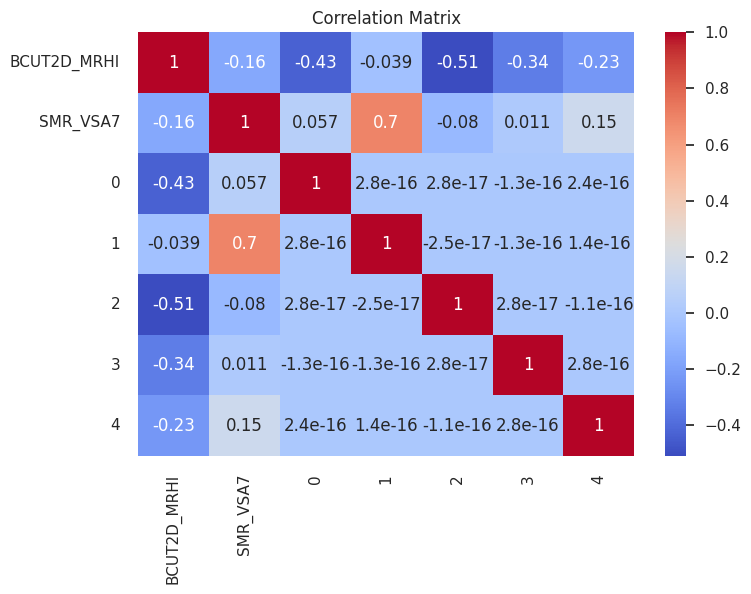

In [191]:
df_to_look = pd.concat([df_FI, df_PCA[0], df_PCA[1], df_PCA[2], df_PCA[3], df_PCA[4]], axis=1)

correlation_matrix = df_to_look.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

наблюдается корреляция PCA компонент 0, 2 и 3 с указанными выше дескрипторами, полученными через оценку feature importance по randomforest

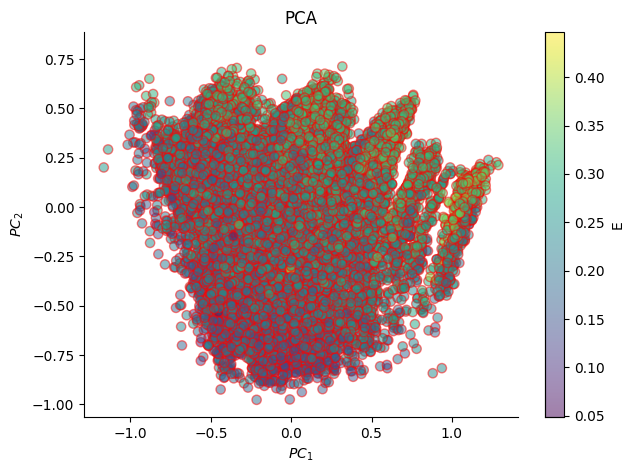

In [102]:
fig = plt.figure(figsize=(7,5))
ax  = fig.add_subplot(111)
scatter = ax.scatter(X_reduced[:,0], -X_reduced[:,1], c=y, s=45, edgecolors='red', alpha=0.5)
colorbar = fig.colorbar(scatter, ax=ax, label = "E")
plt.xlabel(r'$PC_1$')
plt.ylabel(r'$PC_2$')
plt.title('PCA')
sns.despine()
plt.show()

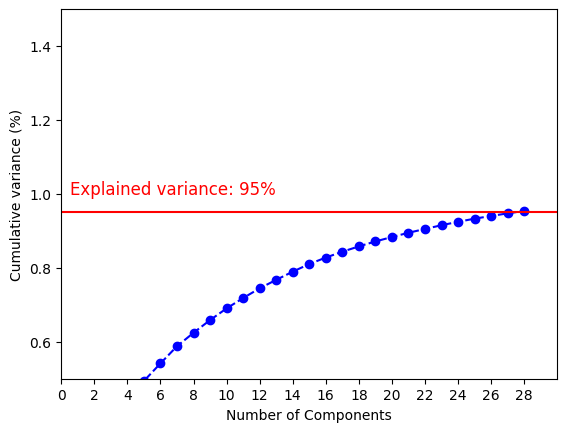

In [114]:
#cumulative variance - подтверждаем выбор 28 компонентов
cvar = np.cumsum(pca.explained_variance_ratio_)
xi = np.arange(1, cvar.shape[0]+1, step=1)

plt.ylim(0.5,1.5)
plt.xlim(0.0,30)
plt.plot(xi, cvar, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 30, step=2))
plt.ylabel('Cumulative variance (%)')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 1, 'Explained variance: 95%', color = 'red', fontsize=12)
ax.grid(axis='x')
plt.show()

<Axes: title={'center': 'Component Variance'}, xlabel='PCs', ylabel='Eigenvalues'>

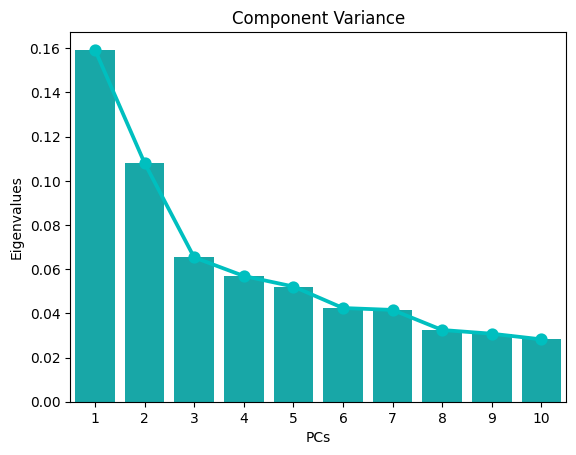

In [111]:
#корреляция для каждого PC
#можно брать первые 2 компонента с наивысшей component variance; при желании даже 1
dfScree = pd.DataFrame({'Eigenvalues':pca.explained_variance_,'PCs':[i for i in range(1,pca.n_components_+1)]})

sns.barplot(x='PCs',y="Eigenvalues",data=dfScree[0:10], color="c").set_title('Component Variance')
sns.pointplot(x='PCs',y="Eigenvalues",data=dfScree[0:10], color="c")

In [115]:
#tsne as nonlinear
from sklearn.manifold import TSNE

In [146]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(X_tsne)

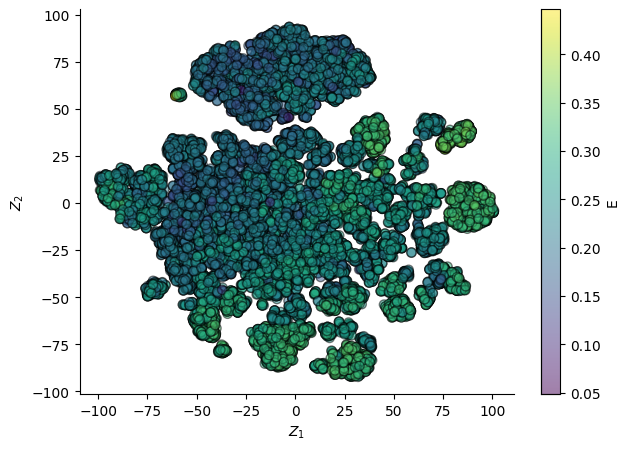

In [119]:
fig = plt.figure(figsize=(7,5))
ax  = fig.add_subplot(111)
scatter = ax.scatter(X_tsne[:,0], X_tsne[:,1], c=y, s=45, edgecolors='black', alpha=0.5)
colorbar = fig.colorbar(scatter, ax=ax, label = "E")
plt.xlabel(r'$Z_1$')
plt.ylabel(r'$Z_2$')
sns.despine()
plt.show()

In [161]:
print('Kullback-Leibler divergence: ', tsne.kl_divergence_)
#высоковата, чем ближе к 0 тем лучше

Kullback-Leibler divergence:  1.6423687934875488


в целом эти данные позволяют использовать для модели дескрипторы, полученные в ходе feature selection и нормализованные, тк мы получаем все эти дескрипторы из наших же smiles и существуют известные зависимости + 3 этапа feature selection оставили приличное их количество (46 шт), оверфитинга не будет

clustering (hometask 5)

In [122]:
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import OPTICS
from sklearn.cluster import Birch

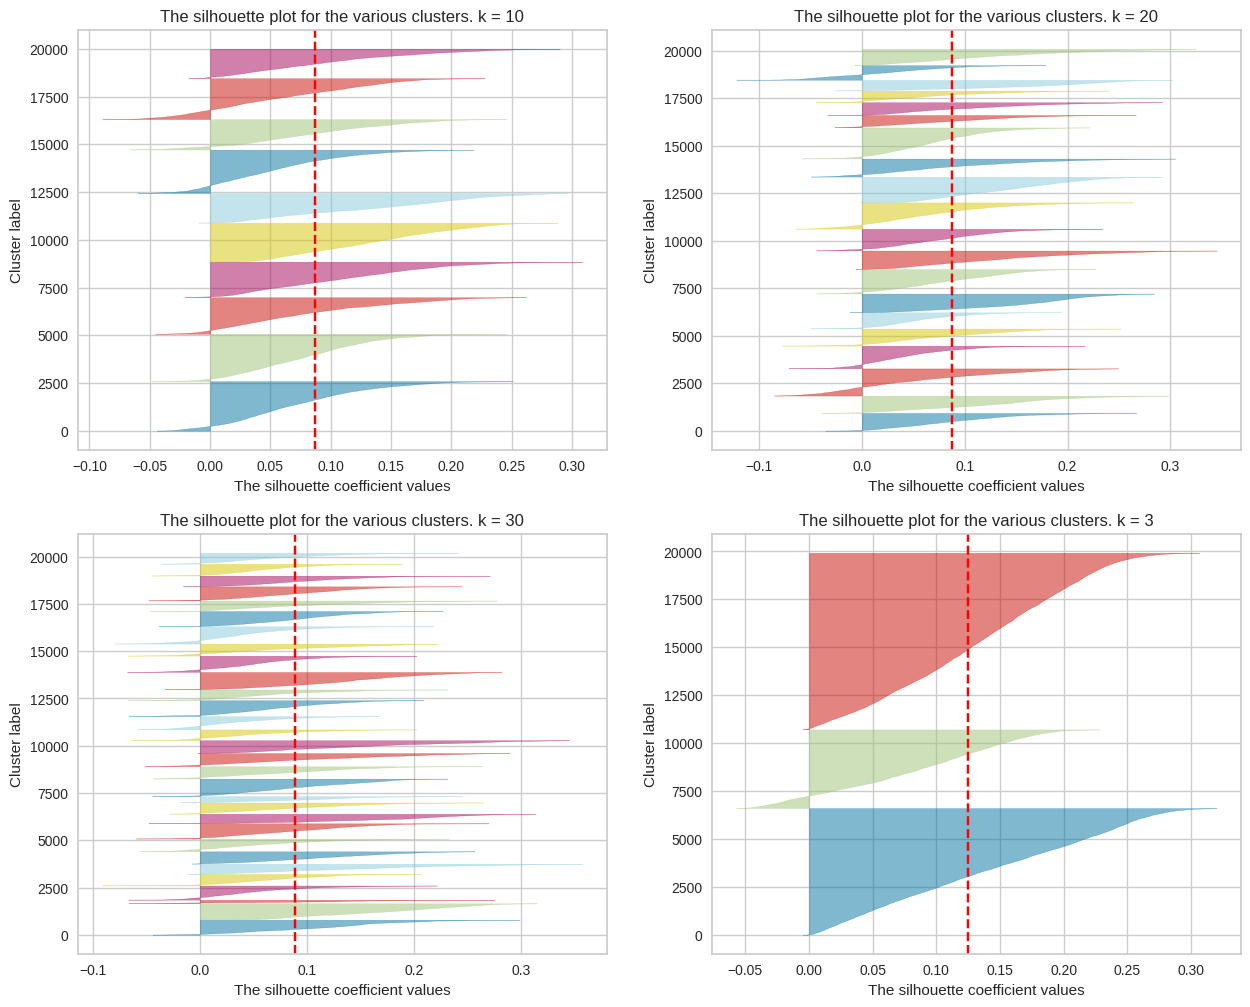

In [131]:
#для PCA
plt.figure(figsize=(15, 12))
for n, k in enumerate([10, 20, 30, 3]):

    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=1984)
    X = df_PCA
    km.fit(X)
    ax = plt.subplot(2, 2, n + 1)
    ax.set_title(f"The silhouette plot for the various clusters. k = {k}")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax)
    visualizer.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


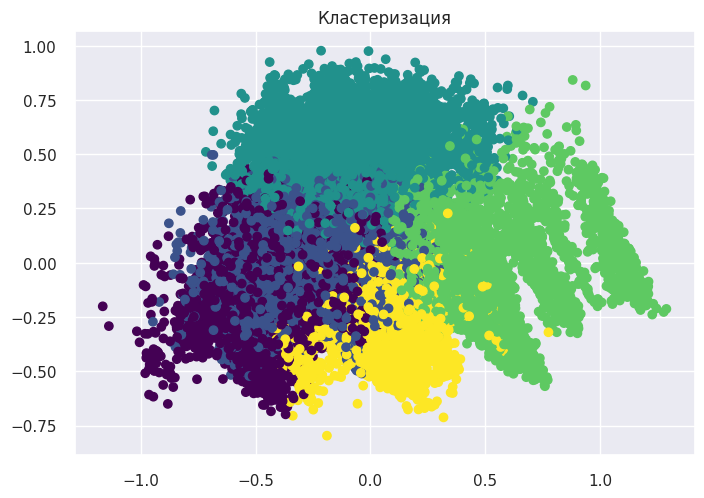

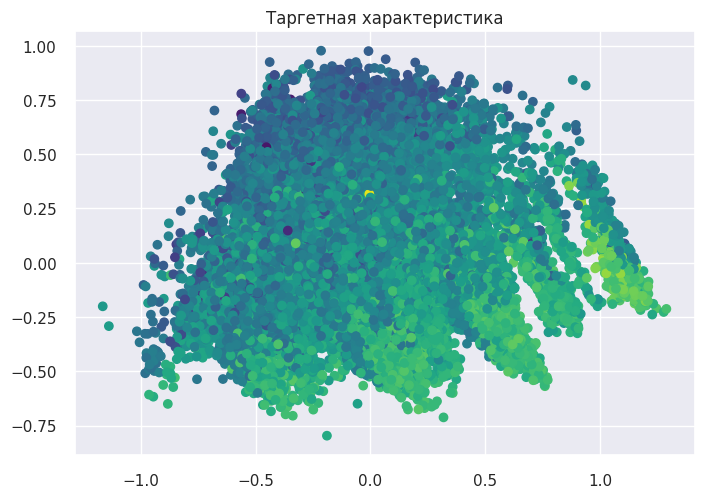

In [164]:
X = df_PCA
y = df['gap']

#в предыдущем вариант k=3 было хоть как-то. поставим 5 и попробуем сравнить с кластеризацией по gap
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(X)

plt.figure()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis')
plt.title('Кластеризация')
plt.show()

#
plt.figure()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis')
plt.title('Таргетная характеристика')
plt.show()

Кластеризуются данные очень плохо, везде очень низкие значения коэффициентов, даже для k=3. Дальше попробуем кластеризовывать по результатам tsne

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


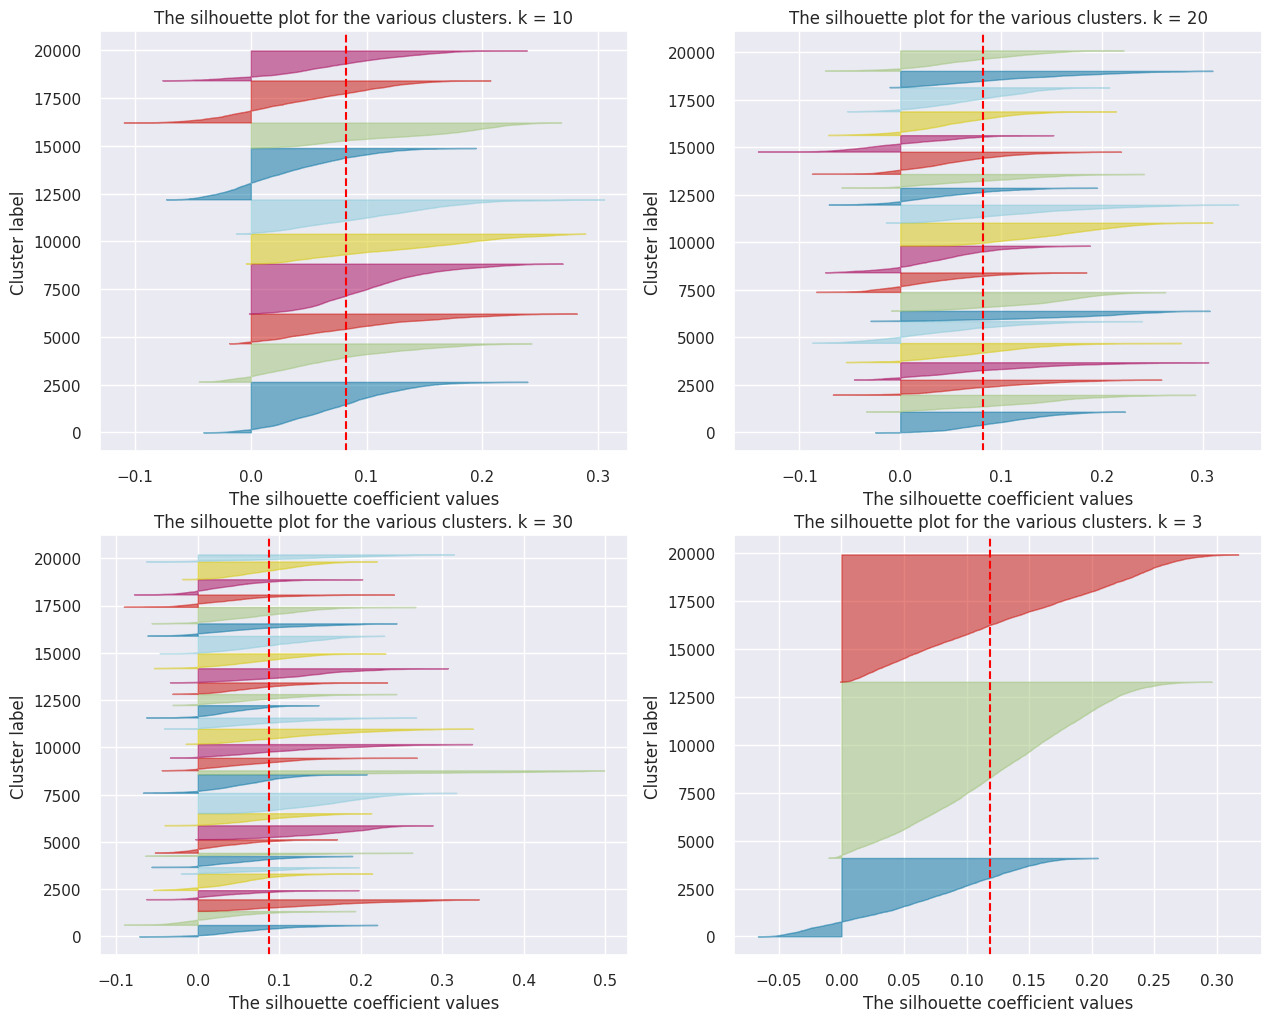

In [166]:
#ради интереса кластеризация на непожатых дескрипторах до сокращения размерности
plt.figure(figsize=(15, 12))
for n, k in enumerate([10, 20, 30, 3]):

    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=1984)
    X = df_sc
    km.fit(X)
    ax = plt.subplot(2, 2, n + 1)
    ax.set_title(f"The silhouette plot for the various clusters. k = {k}")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax)
    visualizer.fit(X)

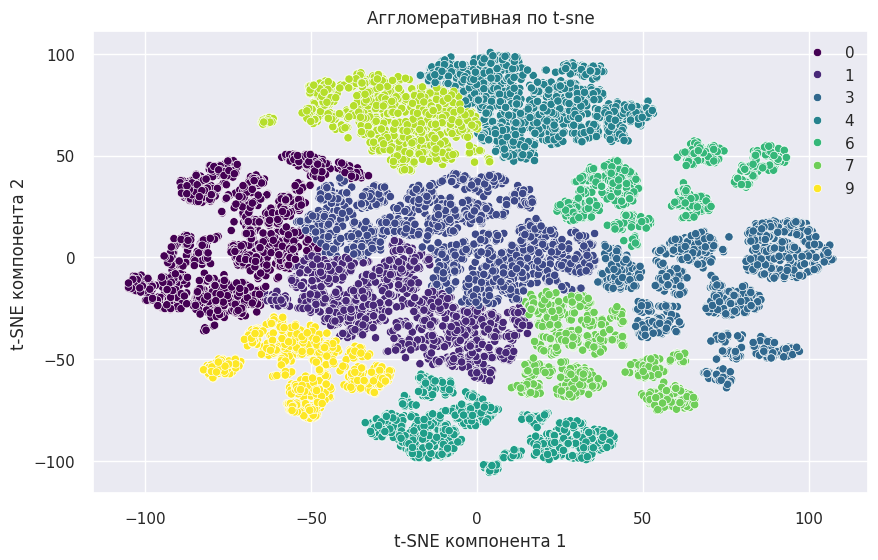

In [162]:
#кластеризация по результатам tsne
from sklearn.cluster import AgglomerativeClustering

#алгоритм кластеризации
agglomerative = AgglomerativeClustering(n_clusters=10)
clusters = agglomerative.fit_predict(X_tsne)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=clusters, palette='viridis')
plt.title('Аггломеративная по t-sne')
plt.xlabel('t-SNE компонента 1')
plt.ylabel('t-SNE компонента 2')
plt.show()

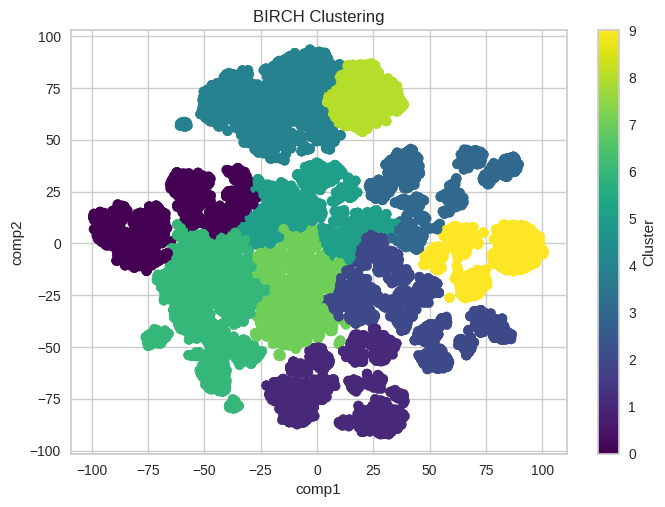

In [152]:
birch = Birch(n_clusters=10)
birch.fit(df_tsne)

labels = birch.labels_

plt.scatter(df_tsne[0], df_tsne[1], c=labels, cmap='viridis')
plt.xlabel('t-sne компонента 1')
plt.ylabel('t-sne компонента 2)
plt.title('BIRCH кластеризация')
plt.show()

Вывод: данные плохо поддаются адекватной кластеризации. Предположение, почему так: я пренебрегла энкодингом SMILES, может быть, если бы оно было среди подлежащего PCA, там что-то и сработало бы.